In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

In [19]:
import matplotlib as matplotlib
print(matplotlib.__version__)

3.7.2


In [2]:
df_train = pd.read_csv('train.csv')


In [3]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df_train.isnull().any()

tBodyAcc-mean()-X       False
tBodyAcc-mean()-Y       False
tBodyAcc-mean()-Z       False
tBodyAcc-std()-X        False
tBodyAcc-std()-Y        False
                        ...  
angle(X,gravityMean)    False
angle(Y,gravityMean)    False
angle(Z,gravityMean)    False
subject                 False
Activity                False
Length: 563, dtype: bool

In [5]:
df_train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
count_row=df_train.shape[0]

In [8]:
print(count_row)

7352


In [9]:
count_col=df_train.shape[1]

In [10]:
print(count_col)

563


In [11]:
print(df_train.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   


In [12]:
print(df_train.describe(include='all'))


        tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count         7352.000000        7352.000000        7352.000000   
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean             0.274488          -0.017695          -0.109141   
std              0.070261           0.040811           0.056635   
min             -1.000000          -1.000000          -1.000000   
25%              0.262975          -0.024863          -0.120993   
50%              0.277193          -0.017219          -0.108676   
75%              0.288461          -0.010783          -0.097794   
max              1.000000           1.000000           1.000000   

        tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
count        7352.000000       7352.000000       7352.000000   
unique               NaN               NaN               NaN   
top

In [13]:
#df_train.drop(columns='subject', inplace=True)


#df_test.drop(columns='subject',inplace=True)

In [14]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # Filter columns
    nRow, nCol = df.shape
    columnNames = list(df)
    
    # Calculate number of rows using math.ceil
    nGraphRow = math.ceil(nCol / nGraphPerRow)
    
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

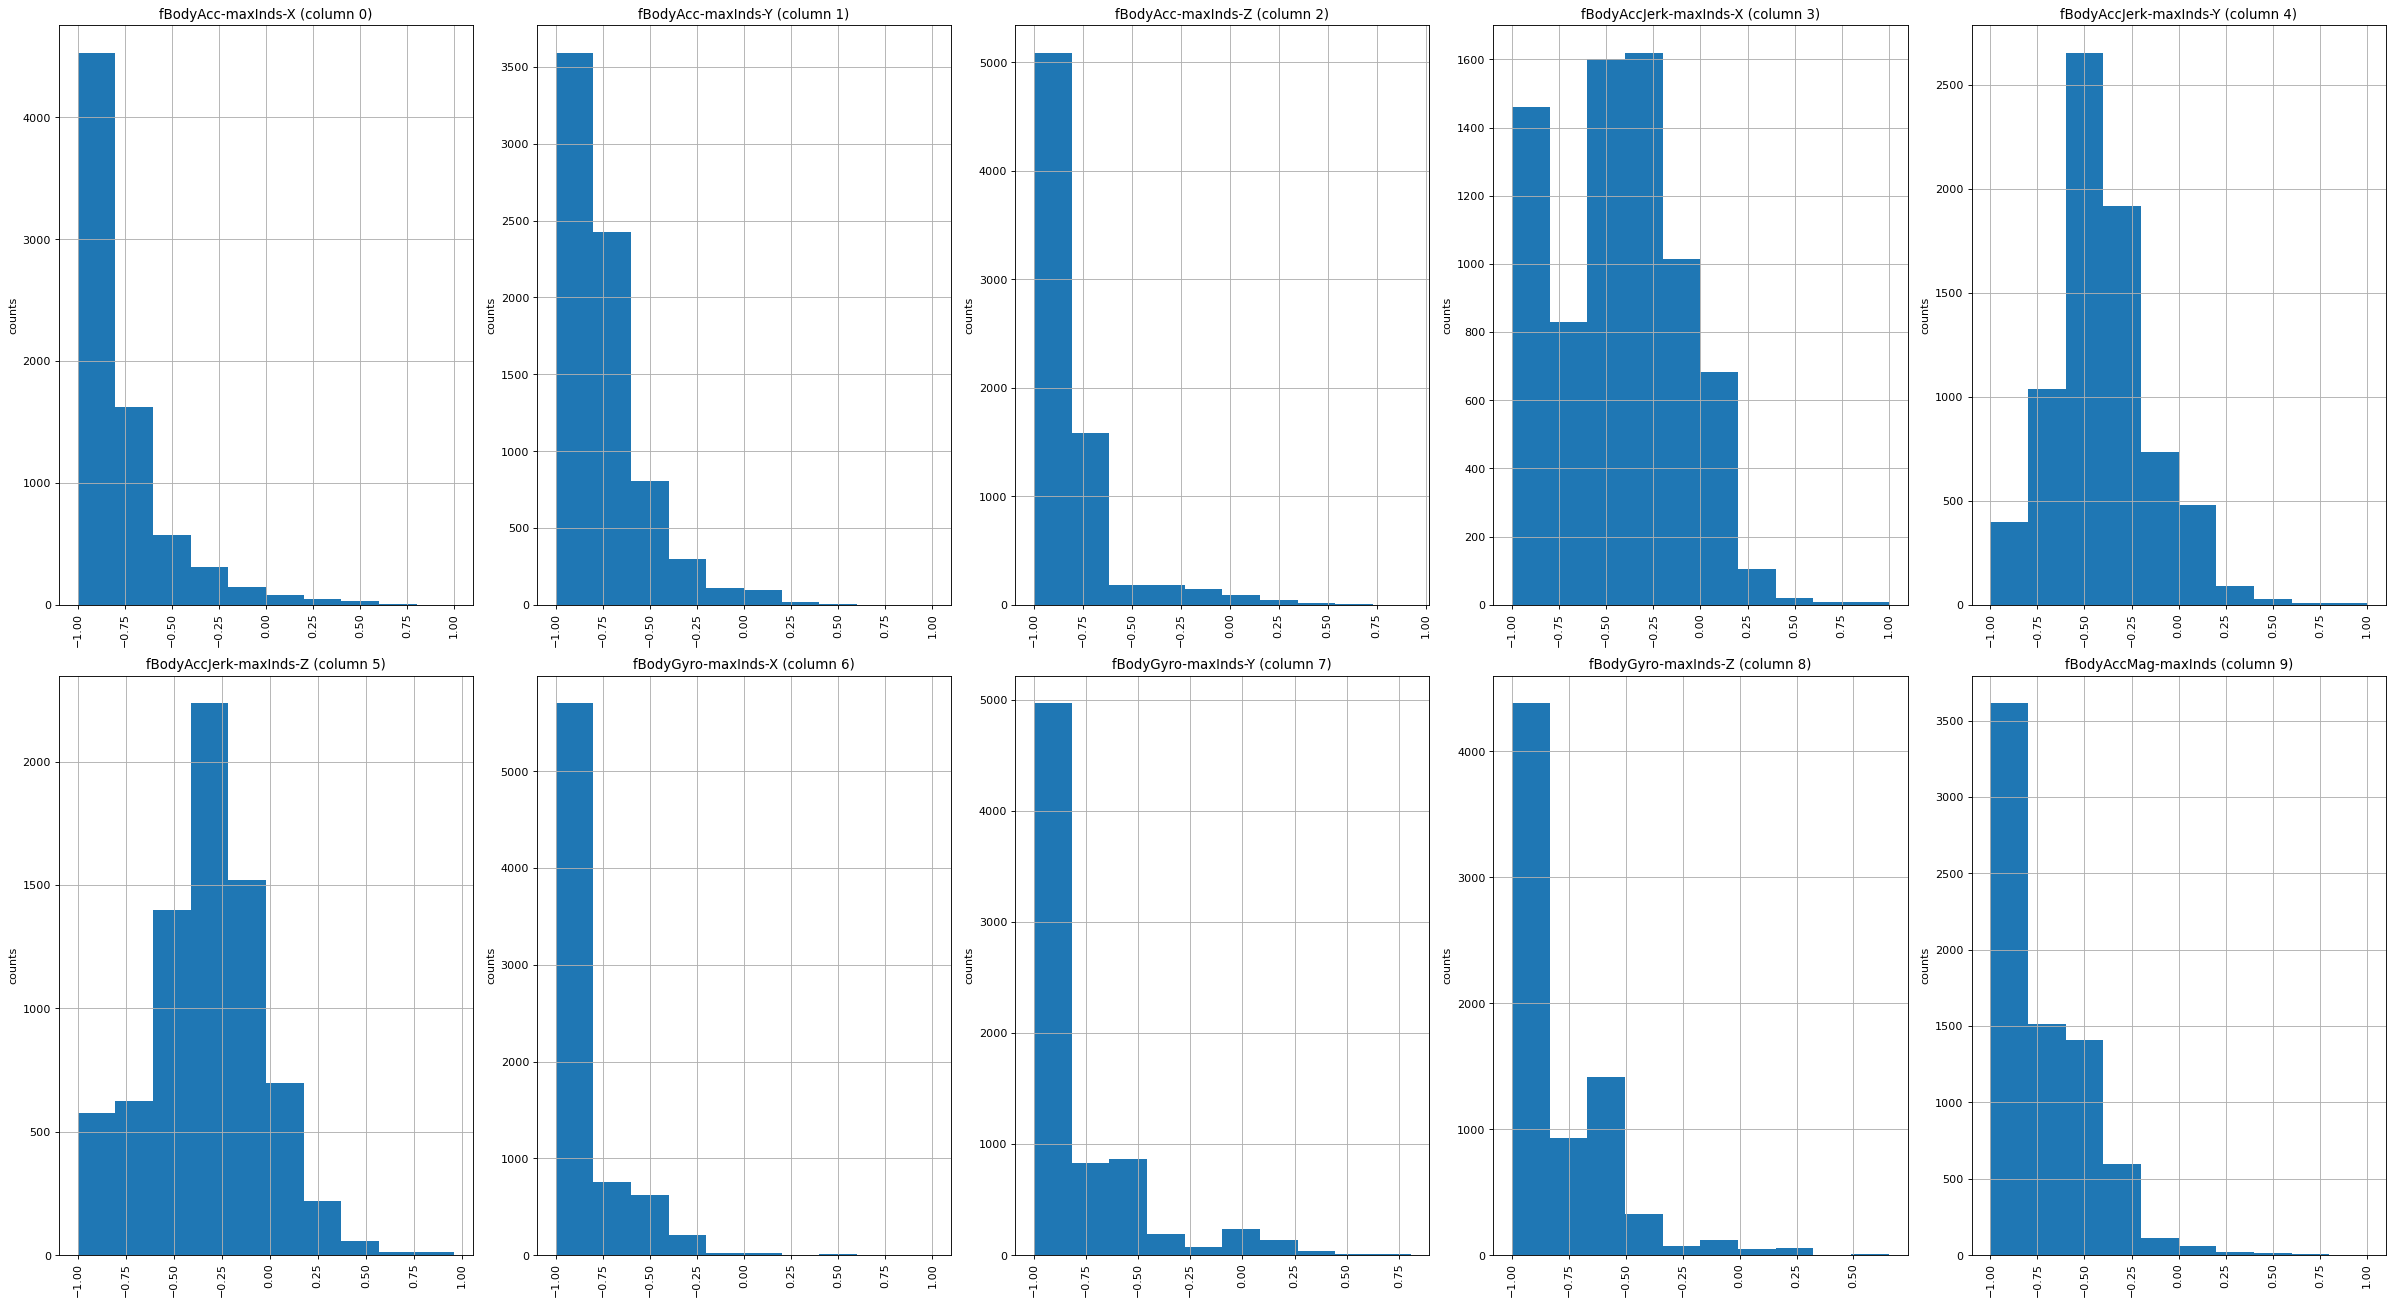

In [15]:
plotPerColumnDistribution(df_train, 10, 5)

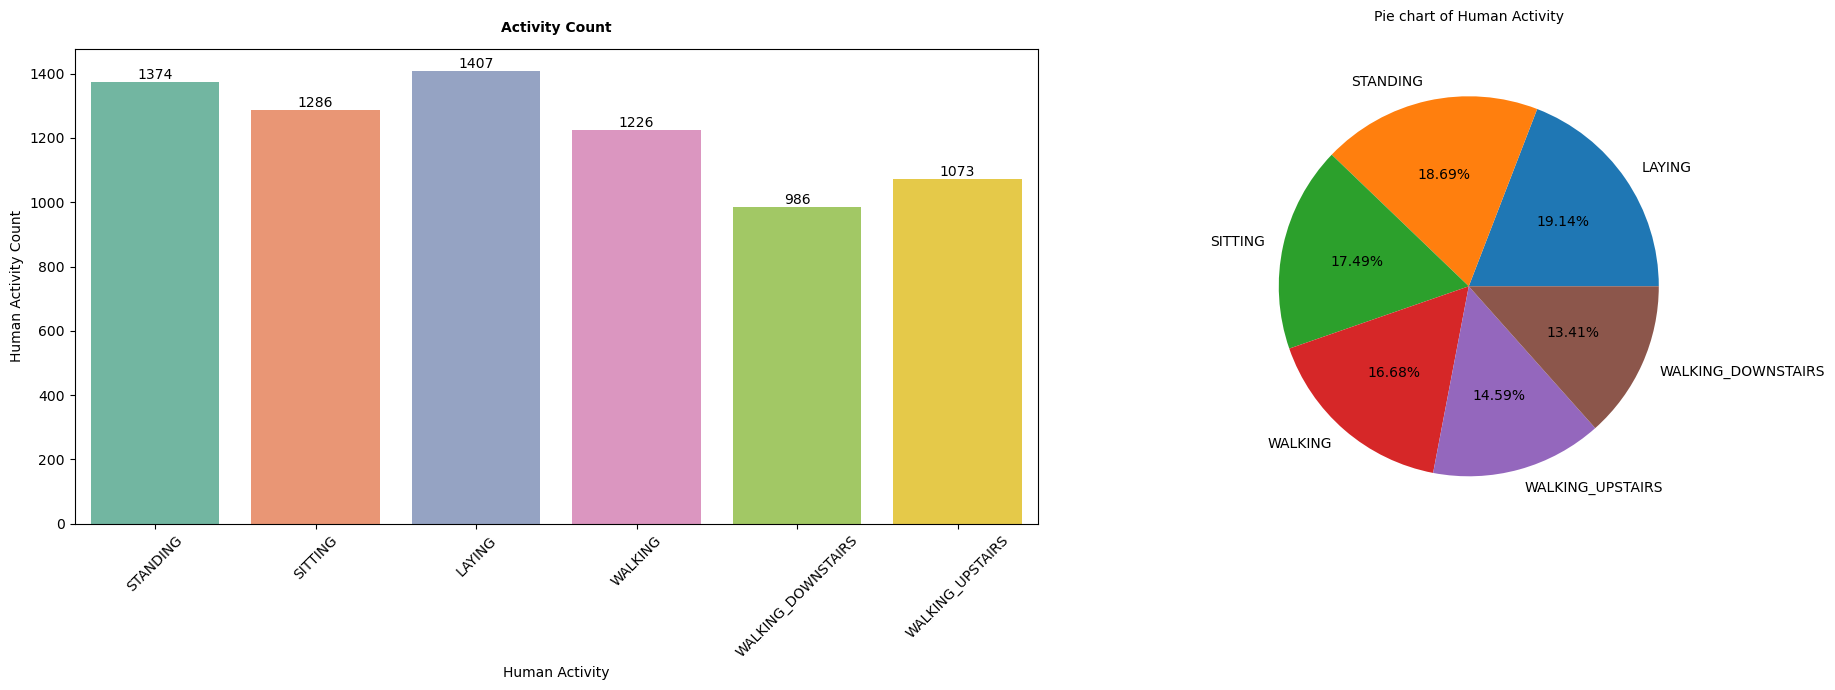

In [16]:
plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df_train, x='Activity', palette='Set2')
plt.title("Activity Count", pad=12, fontsize=10, fontweight='bold')
plt.xlabel('Human Activity')
plt.ylabel('Human Activity Count')
plt.xticks(rotation=45)
ax1.bar_label(ax1.containers[0])

plt.subplot(1, 2, 2)
acivity_count_labels = df_train['Activity'].value_counts()
plt.pie(acivity_count_labels,
        autopct="%.2f%%",
        labels = acivity_count_labels.index
)
plt.title("Pie chart of Human Activity", pad=20, fontsize=10, fontweight=20)

plt.tight_layout()
plt.show()

In [17]:
print(df_train.columns)
df_train.columns = df_train.columns.str.strip()


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['Activity'] = label_encoder.fit_transform(df_train['Activity'])
df_test['Activity'] = label_encoder.fit_transform(df_test['Activity'])



In [19]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X_train = df_train.drop(columns=['Activity']) 
X_test = df_test.drop(columns=['Activity']) 
y_train = df_train['Activity']
y_test = df_test['Activity']

# Standardize the features
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)


# Convert the scaled features back to a DataFrame (optional)
X_train = pd.DataFrame(X_scaled_train, columns=X_train.columns)
X_test = pd.DataFrame(X_scaled_test, columns=X_test.columns)

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [23]:


# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [24]:
# Evaluate the models
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8004750593824228
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.59      0.87      0.70       491
           2       0.78      0.43      0.56       532
           3       0.88      0.85      0.87       496
           4       0.81      0.88      0.84       420
           5       0.83      0.80      0.81       471

    accuracy                           0.80      2947
   macro avg       0.81      0.80      0.80      2947
weighted avg       0.82      0.80      0.79      2947



In [25]:

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9202578893790295
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.83      0.90      0.86       491
           2       0.90      0.83      0.86       532
           3       0.95      0.94      0.95       496
           4       0.92      0.90      0.91       420
           5       0.92      0.96      0.94       471

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Create an SVM model
svm_model = SVC(kernel='linear')  # You can try other kernels like 'rbf', 'poly', or 'sigmoid'

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9616559212758737
Confusion Matrix:
[[537   0   0   0   0   0]
 [  2 438  50   0   0   1]
 [  0  26 506   0   0   0]
 [  0   0   0 485   5   6]
 [  0   0   0   2 407  11]
 [  0   0   0   7   3 461]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.89      0.92       491
           2       0.91      0.95      0.93       532
           3       0.98      0.98      0.98       496
           4       0.98      0.97      0.97       420
           5       0.96      0.98      0.97       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

